In [1]:
import sys
sys.path.append('..')
import freyberg_trial_and_error as freytrial
import freyberg_setup as frey_mod
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pyemu


In [2]:
frey_mod.setup_pest_kr()

['botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'obs_loc.csv', 'potobs_group.csv', 'Process_output.py', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_kr
FloPy is using the following executable to run the model: E:\git\GW1876\activities\freyberg_trialerror\freyberg_kr\mfnwt.exe

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-D

In [3]:
inpst = pyemu.Pst(os.path.join(frey_mod.WORKING_DIR_KR,frey_mod.PST_NAME_KR))

In [4]:
inpst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
parnme,,,,,,,,,,
rch_0,rch_0,fixed,factor,1.0,0.75,1.25,rch,1.0,0.0,1
rch_1,rch_1,fixed,factor,1.0,0.75,1.25,rch,1.0,0.0,1
hk,hk,log,factor,5.0,0.50,50.00,hk,1.0,0.0,1


In [5]:
inpst.parameter_data.loc['rch_1', 'partrans'] = 'fixed'

In [6]:
inpst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
parnme,,,,,,,,,,
rch_0,rch_0,fixed,factor,1.0,0.75,1.25,rch,1.0,0.0,1
rch_1,rch_1,fixed,factor,1.0,0.75,1.25,rch,1.0,0.0,1
hk,hk,log,factor,5.0,0.50,50.00,hk,1.0,0.0,1


In [7]:
inpst.write(os.path.join(frey_mod.WORKING_DIR_KR,frey_mod.PST_NAME_KR))

run():pestpp.exe onerun.pst


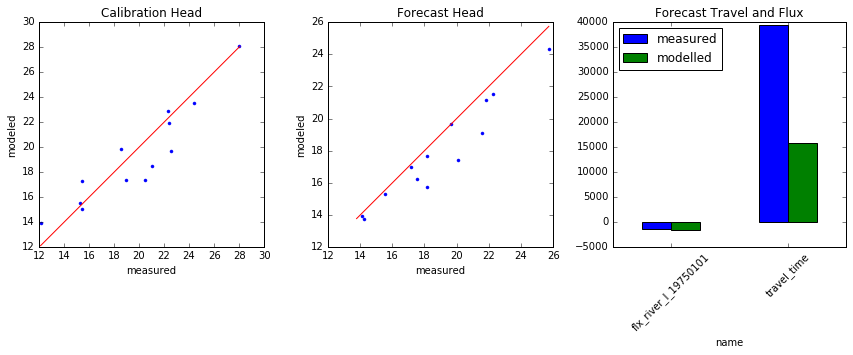

In [8]:
freytrial.rerun_new_pars(hk=10,rch_0=1.2)

In [12]:
from ipywidgets import interact


run():pestpp.exe onerun.pst


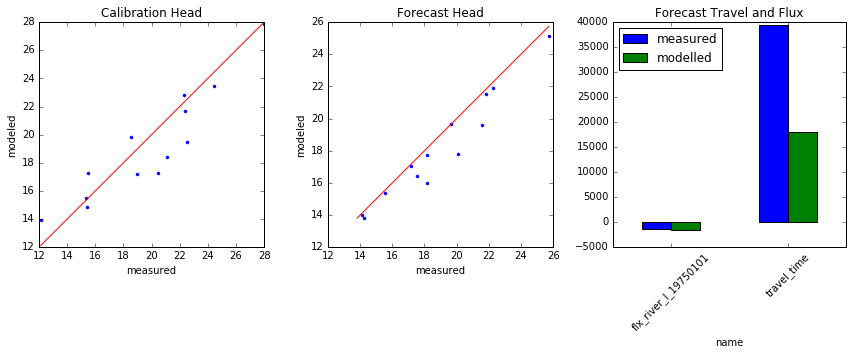

In [13]:
interact(freytrial.rerun_new_pars,
         hk=(1, 20., .5), rch_0=(0.0, 5.0, .5));